<a href="https://colab.research.google.com/github/CopotronicRifat/CS-5783-Machine-Learning-Assignments/blob/main/ML_ASSIGNMENT_04_PROBLEM_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORT PACKAGES

import numpy as np
import pandas as pd

In [ ]:
# DRIVE MOUNT

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# READ DATA FROM DRIVE

housing_data = pd.ExcelFile("/content/drive/My Drive/Asssignment4_Data.xlsx")
train_df = pd.read_excel(housing_data, 'Train', index_col = 'House ID')
test_df = pd.read_excel(housing_data, 'Test', index_col = 'House ID')

In [ ]:
# TRAIN AND TEST DATA SPLIT

train_df['Construction type'] = train_df['Construction type'].map({'Apartment':0,'Condo':1,'House':2}) 
test_df['Construction type']  = test_df['Construction type'].map({'Apartment':0,'Condo':1,'House':2})

In [ ]:
# PRINT TRAINING DATA

print(train_df)

          Local Price  Bathrooms  Land Area  Living area  # Garages  # Rooms  \
House ID                                                                       
1              4.9176        1.0     3.4720        0.998        1.0        7   
2              5.0208        1.0     3.5310        1.500        2.0        7   
3              4.5429        1.0     2.2750        1.175        1.0        6   
4              4.5573        1.0     4.0500        1.232        1.0        6   
5              5.0597        1.0     4.4550        1.121        1.0        6   
6              3.8910        1.0     4.4550        0.988        1.0        6   
7              5.8980        1.0     5.8500        1.240        1.0        7   
8              5.6039        1.0     9.5200        1.501        0.0        6   
9             16.4202        2.5     9.8000        3.420        2.0       10   
10            14.4598        2.5    12.8000        3.000        2.0        9   
11             5.8282        1.0     6.4

In [ ]:
# PRINT TEST DATA

print(test_df)

          Local Price  Bathrooms  Land Area  Living area  # Garages  # Rooms  \
House ID                                                                       
24             6.0931        1.5     6.7265        1.652        1.0        6   
25             8.3607        1.5     9.1500        1.777        2.0        8   
26             8.1400        1.0     8.0000        1.504        2.0        7   
27             9.1416        1.5     7.3262        1.831        1.5        8   
28            12.0000        1.5     5.0000        1.200        2.0        6   

          # Bedrooms  Age of home  Construction type  
House ID                                              
24                 3           44                  0  
25                 4           48                  2  
26                 3            3                  2  
27                 4           31                  0  
28                 3           30                  0  


In [ ]:
# DEFINE TRAIN AND TEST DATA

x_train = train_df.drop('Construction type', axis=1).to_numpy()
y_train = train_df['Construction type']
x_test = test_df.drop('Construction type', axis=1).to_numpy()
y_test = test_df['Construction type']

In [ ]:
# CALCULATE DISTANCE FUNCTION

import math

def calc_distance(x, y):
    dimension = len(x)      
    distance  = 0      
    for i in range(dimension):
        distance += ((x[i] - y[i])**2)
    return math.sqrt(distance)

In [ ]:
# TAKING THE VALUE OF 'K' AS INPUT

k = int(input ("ENTER A VAKUE OF 'K; RANGING FROM 1 TO 5 : "))

ENTER A VAKUE OF 'K; RANGING FROM 1 TO 5 : 5


In [ ]:
# K-MEANS CLUSTERING FROM THE VALUE OF 'K' USING MAJORITY VOTE COUNT

from collections import Counter

predict_test = []


for i in x_test:
    distances = []
    for j in x_train:
        distance = calc_distance(i, j)
        distances.append(distance)
    
    df_distance = pd.DataFrame(data = distances, columns = ['distance'], index = y_train.index)

    df_sort_k = df_distance.sort_values(by = ['distance'], axis = 0)[:k]

    counter = Counter(y_train[df_sort_k.index])

    predicts = counter.most_common()[0][0]
    
    predict_test.append(predicts)

print('Predicted class for test data = ', predict_test)
accuracy = (predicts/5)*100
print('Accuracy = ', accuracy)

Predicted class for test data =  [0, 0, 0, 2, 2]
Accuracy =  40.0


In [ ]:
# GET ACCURACIES FOR DIFFERENT VALUES OF 'K'

x = []
y = []

for k in range(20):
    for i in x_test:
        dists = []
        for j in x_train:
            distance = calc_distance(i, j)
            dists.append(distance)
        df_distance = pd.DataFrame(data = distances, columns = ['distance'], index = y_train.index)

        df_sort_k = df_distance.sort_values(by = ['distance'], axis = 0)[:k+1]

        counter = Counter(y_train[df_sort_k.index])

        predicts = counter.most_common()[0][0]
    
        predict_test.append(predicts)
    
    accuracy = (predicts/5)*100
    y.append(accuracy)
    x.append(k+1)

print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 0.0, 0.0, 40.0]


Text(0.5, 1.0, "'k' VS Accuracy Graph")

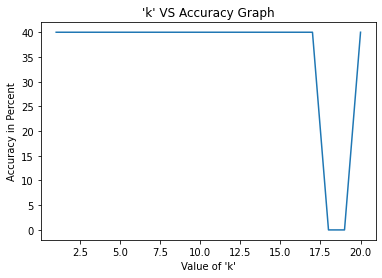

In [ ]:
# PLOT GRAPH OF 'K' AGAINST 'ACCURACY' IN PERCENT

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel("Value of 'k'")
plt.ylabel("Accuracy in Percent")
plt.title ("'k' VS Accuracy Graph")